In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('vgames2.csv')

Saving vgames2.csv to vgames2 (1).csv


In [47]:
df.shape

(16598, 10)

In [48]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [49]:
df = df.dropna()

In [50]:
df.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [51]:
df.shape

(16241, 10)

In [52]:
df.duplicated().sum()

0

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  object 
 7   EU_Sales     16241 non-null  object 
 8   JP_Sales     16241 non-null  object 
 9   Other_Sales  16241 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [54]:
df.describe()

,Unnamed: 0,Year
count,16241.000000,16241.000000
mean,8291.719845,1994.178437
std,4792.062774,155.484265
min,1.000000,0.000000
25%,4143.000000,2003.000000
50%,8284.000000,2007.000000
75%,12441.000000,2010.000000
max,16598.000000,2020.000000


In [55]:
df['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [56]:
df['Genre'].value_counts()

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64

In [57]:
df['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [58]:
df['Platform'].value_counts()

DS      2127
PS2     2121
PS3     1299
Wii     1284
X360    1231
PSP     1193
PS      1185
PC       935
XB       799
GBA      784
GC       541
3DS      498
PSV      409
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [59]:
df['Publisher'].value_counts()

Electronic Arts                 1332
Activision                       963
Namco Bandai Games               924
Ubisoft                          913
Konami Digital Entertainment     821
                                ... 
Marvelous Games                    1
Panther Software                   1
Playmore                           1
mixi, Inc                          1
Mystique                           1
Name: Publisher, Length: 575, dtype: int64

In [60]:
df['Year'] = df['Year'].astype('int')

In [61]:
df = df.drop(df.columns[[0]], axis=1)

In [62]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [63]:
df["NA_Sales"] = df["NA_Sales"].replace({"K":"*0.001", "M":"*1"}, regex=True).map(pd.eval).astype(float)
df["EU_Sales"] = df["EU_Sales"].replace({"K":"*0.001", "M":"*1"}, regex=True).map(pd.eval).astype(float)
df["JP_Sales"] = df["JP_Sales"].replace({"K":"*0.001", "M":"*1"}, regex=True).map(pd.eval).astype(float)
df["Other_Sales"] = df["Other_Sales"].replace({"K":"*0.001", "M":"*1"}, regex=True).map(pd.eval).astype(float)

In [64]:
def changeYear(x):
  if x <= 22:
    x += 2000
  elif x > 22 and x < 99:
    x += 1900
  return x

df['Year']=df['Year'].apply(changeYear)

In [65]:
df["Global_Sales"] = df["NA_Sales"] + df["EU_Sales"] + df["JP_Sales"] + df["Other_Sales"]

In [66]:
df.reset_index()

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...,...
16236,16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16237,16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16238,16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16239,16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [67]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [68]:
df.shape

(16241, 10)

In [69]:
#df.set_index('Year', inplace=False)
#df.groupby('Genre')['NA_Sales'].plot(legend=True)

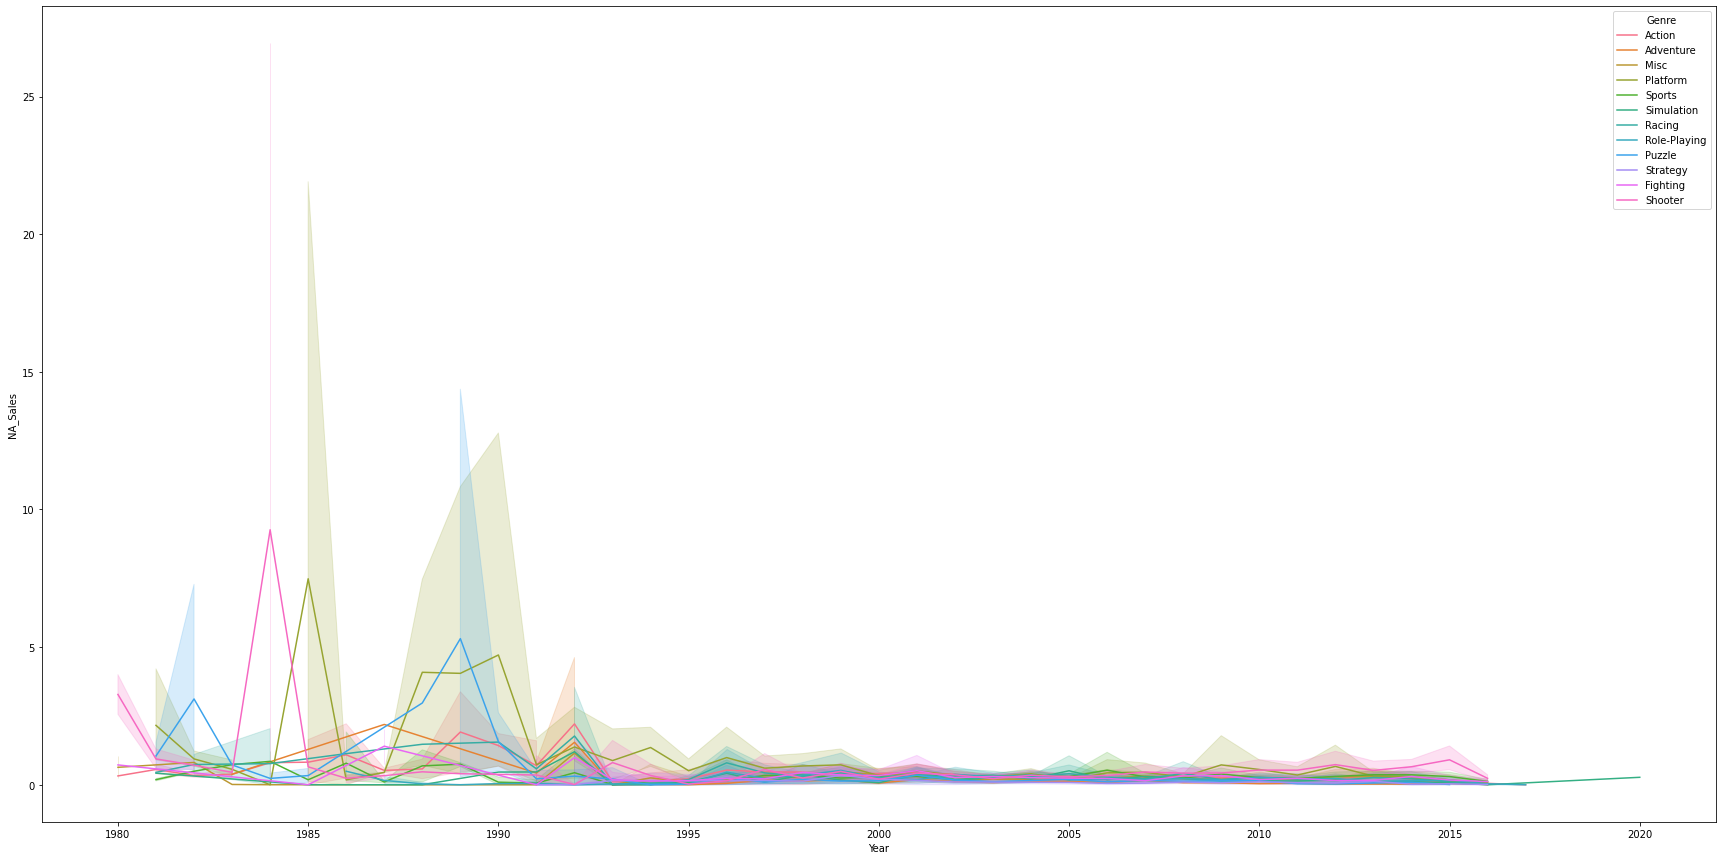

In [70]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.lineplot(data=df, x='Year', y='NA_Sales', hue='Genre', ax=ax)

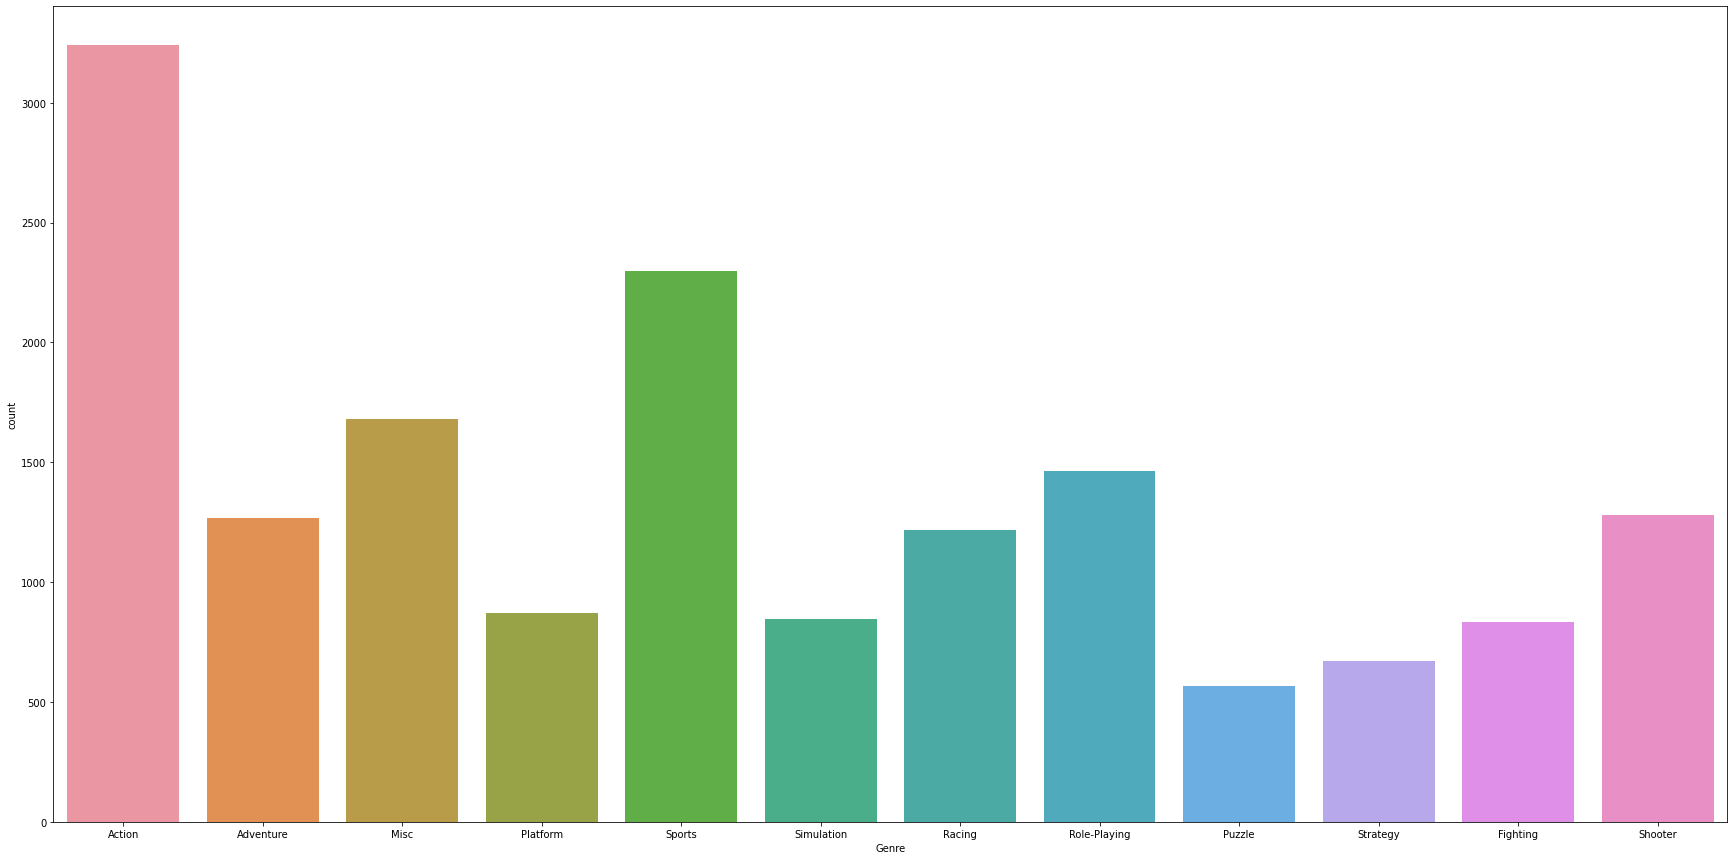

In [71]:
plt.subplots(figsize=(30, 15))
sns.countplot(x="Genre", data=df)

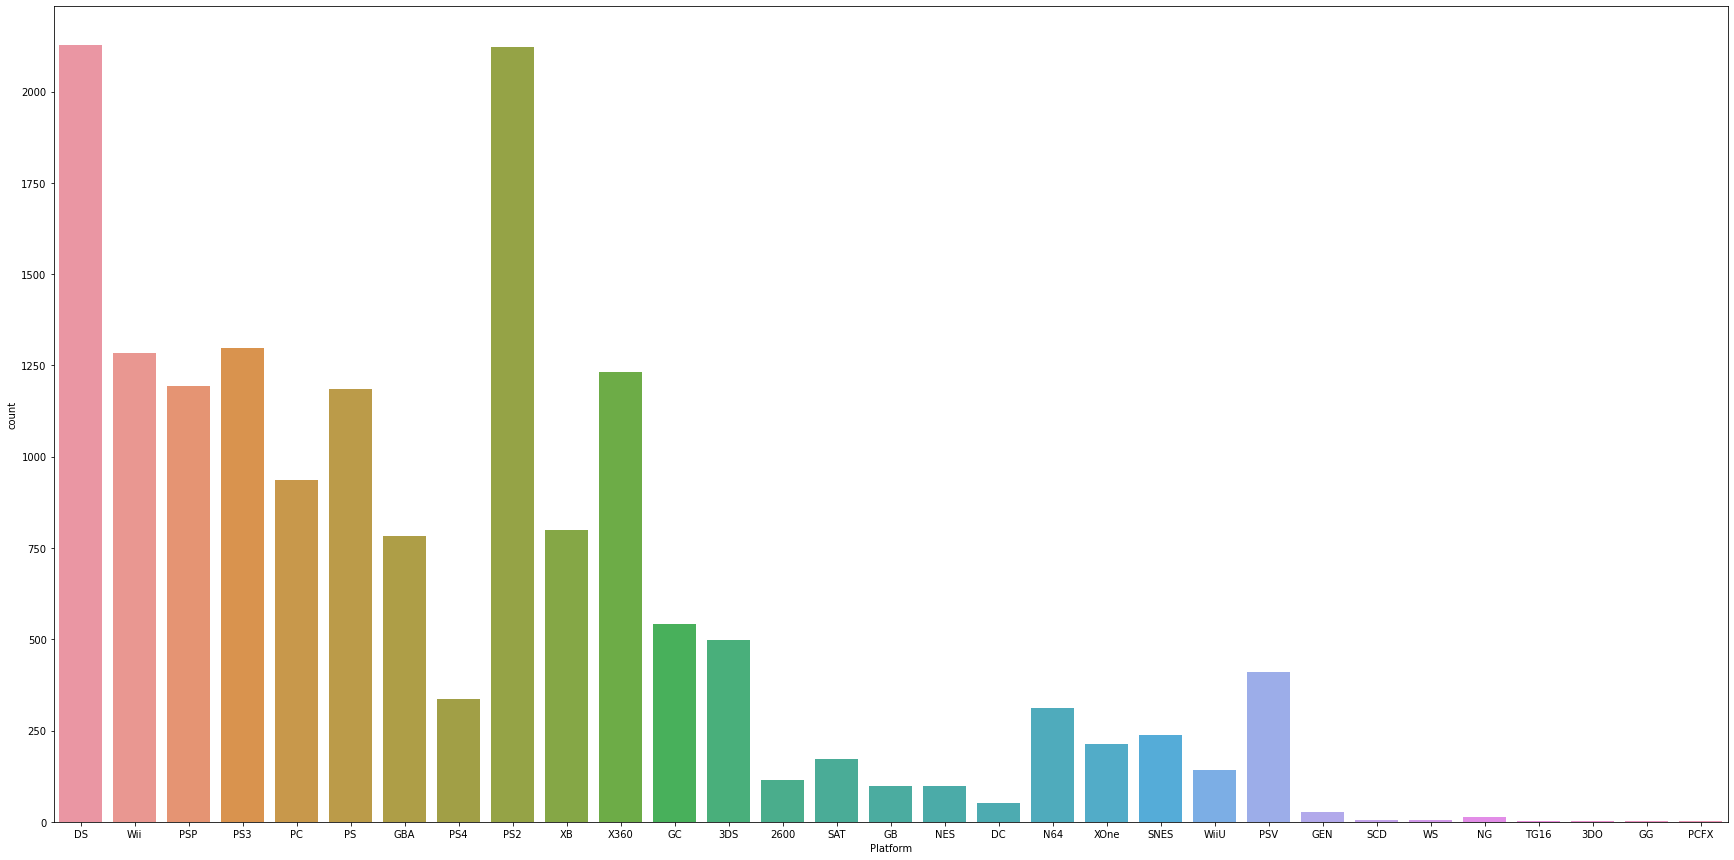

In [72]:
plt.subplots(figsize=(30, 15))
sns.countplot(x="Platform", data=df)

In [73]:
df_Modern = df.query("Year >= 2005 and Year <=2016")
df_Modern

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16592,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.00,0.00,0.02,0.00,0.02
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79


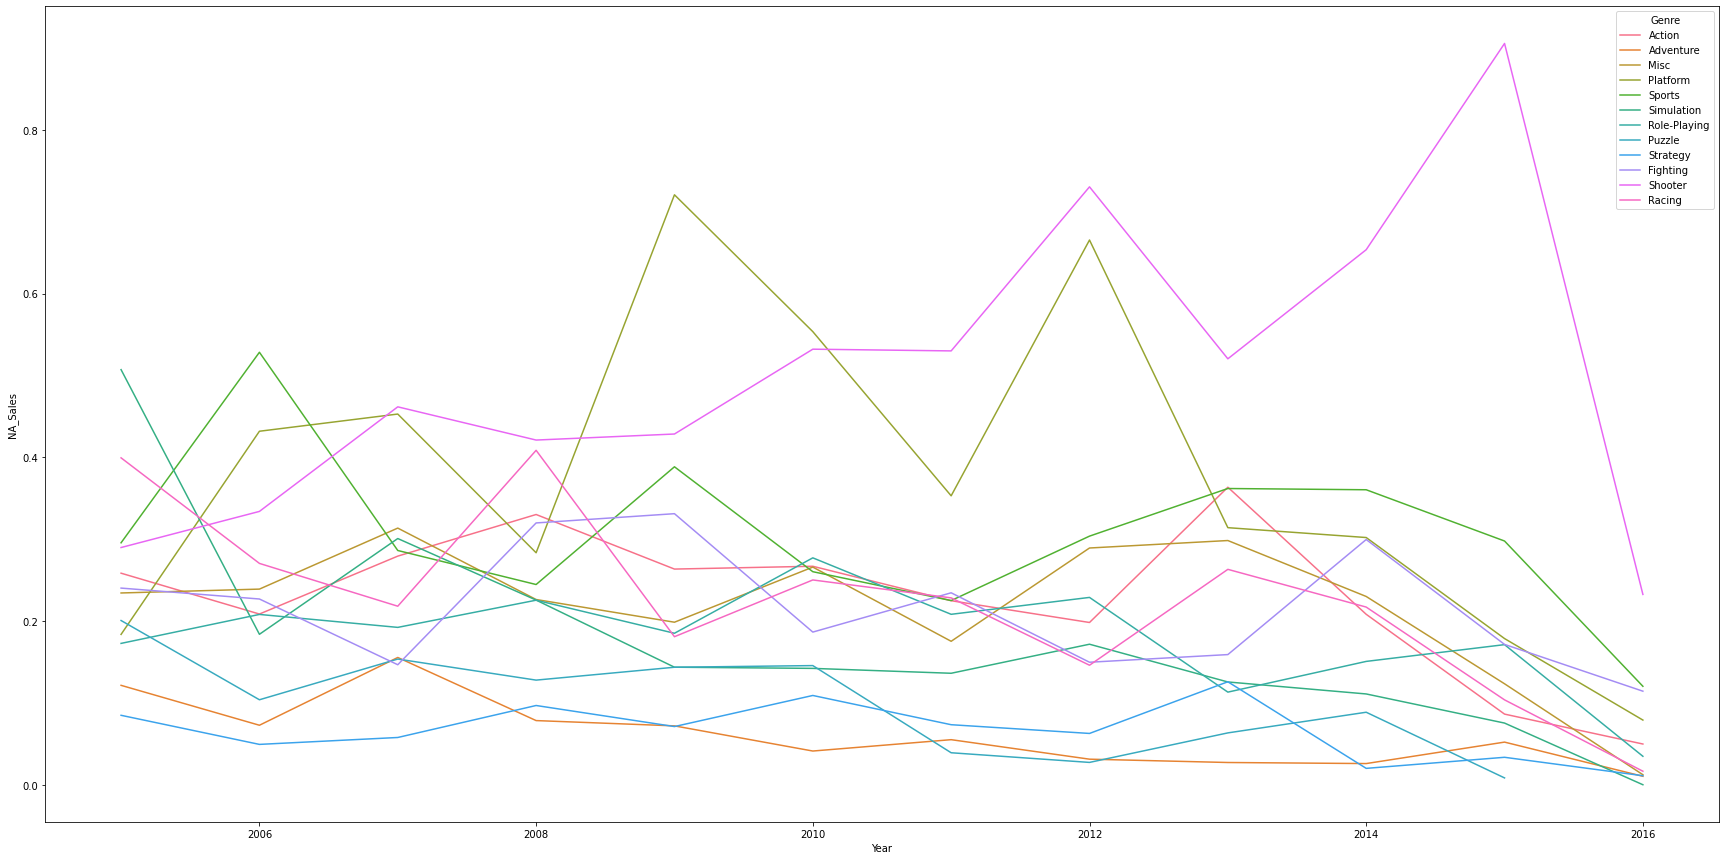

In [74]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.lineplot(data=df_Modern, x='Year', y='NA_Sales', hue='Genre', ax=ax, ci=None)

In [75]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [76]:
Simulation = (df.Genre == 'Simulation')
df[Simulation]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
11,Harvest Moon: More Friends of Mineral Town,GBA,2003,Simulation,Ubisoft,0.14,0.05,0.00,0.00,0.19
21,Ghost in the Shell,PS,1997,Simulation,Sony Computer Entertainment,0.06,0.04,0.00,0.01,0.11
53,IL-2 Sturmovik: Birds of Prey,PS3,2009,Simulation,505 Games,0.34,0.26,0.00,0.10,0.70
121,Armored Core: Master of Arena,PS,1999,Simulation,From Software,0.07,0.05,0.13,0.02,0.27
...,...,...,...,...,...,...,...,...,...,...
16459,Catz,DS,2006,Simulation,Ubisoft,0.49,0.02,0.00,0.04,0.55
16469,Muv-Luv Alternative,PS3,2012,Simulation,5pb,0.00,0.00,0.01,0.00,0.01
16491,1701 A.D.,PC,2006,Simulation,Deep Silver,0.00,0.25,0.00,0.05,0.30
16504,Crafting Mama,DS,2010,Simulation,505 Games,0.40,0.21,0.01,0.05,0.67


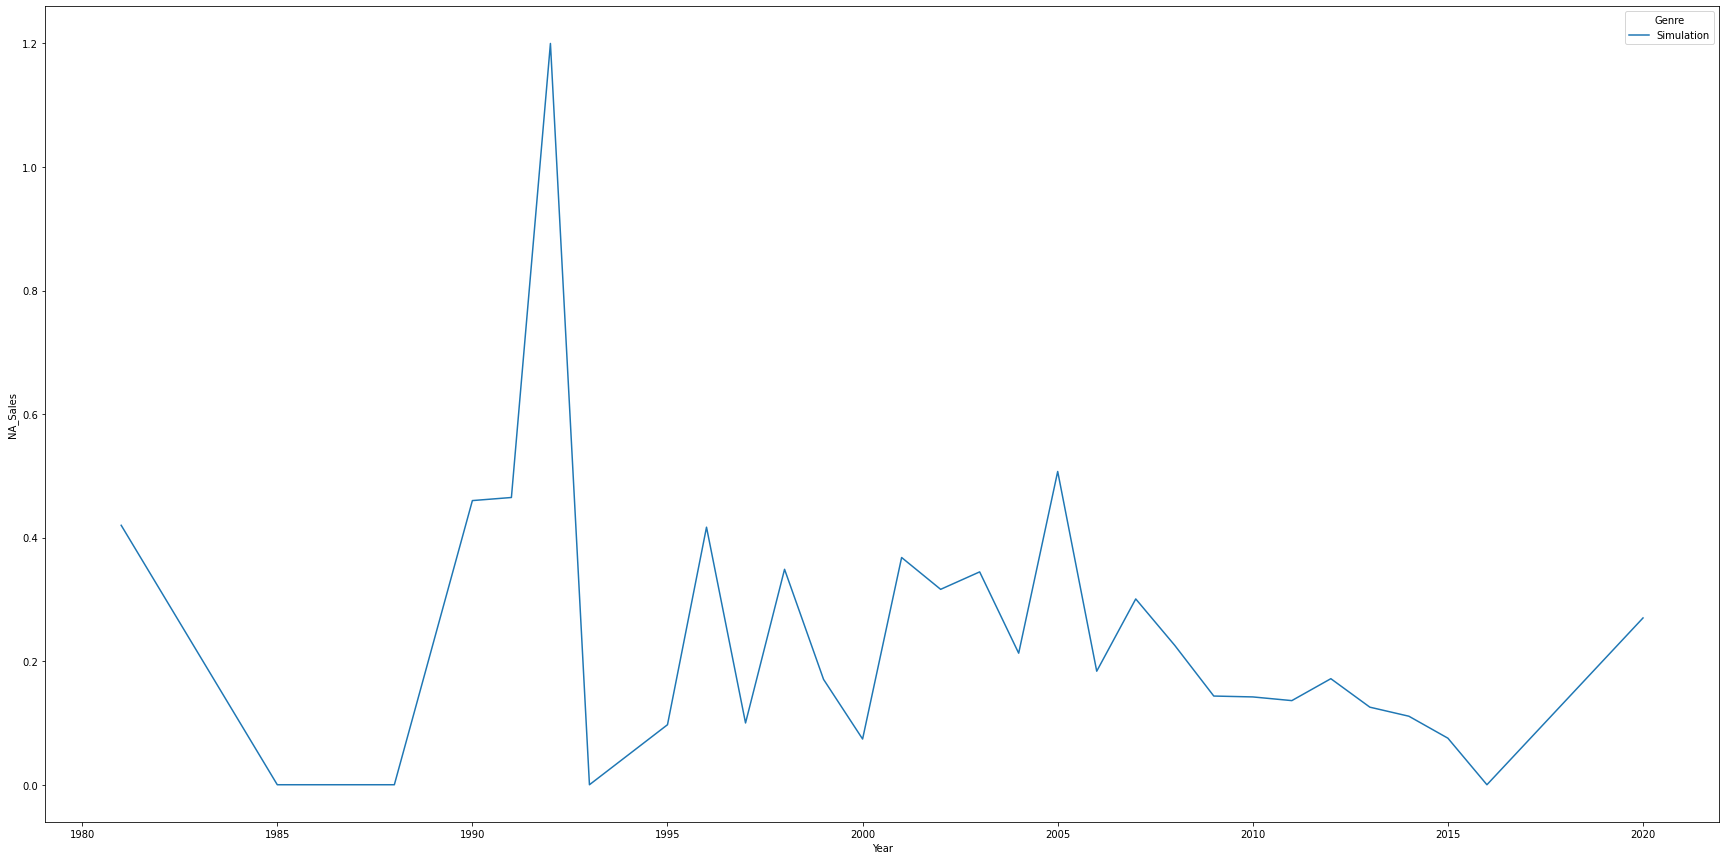

In [77]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.lineplot(data=df[Simulation], x='Year', y='NA_Sales', hue='Genre', ax=ax, ci=None)

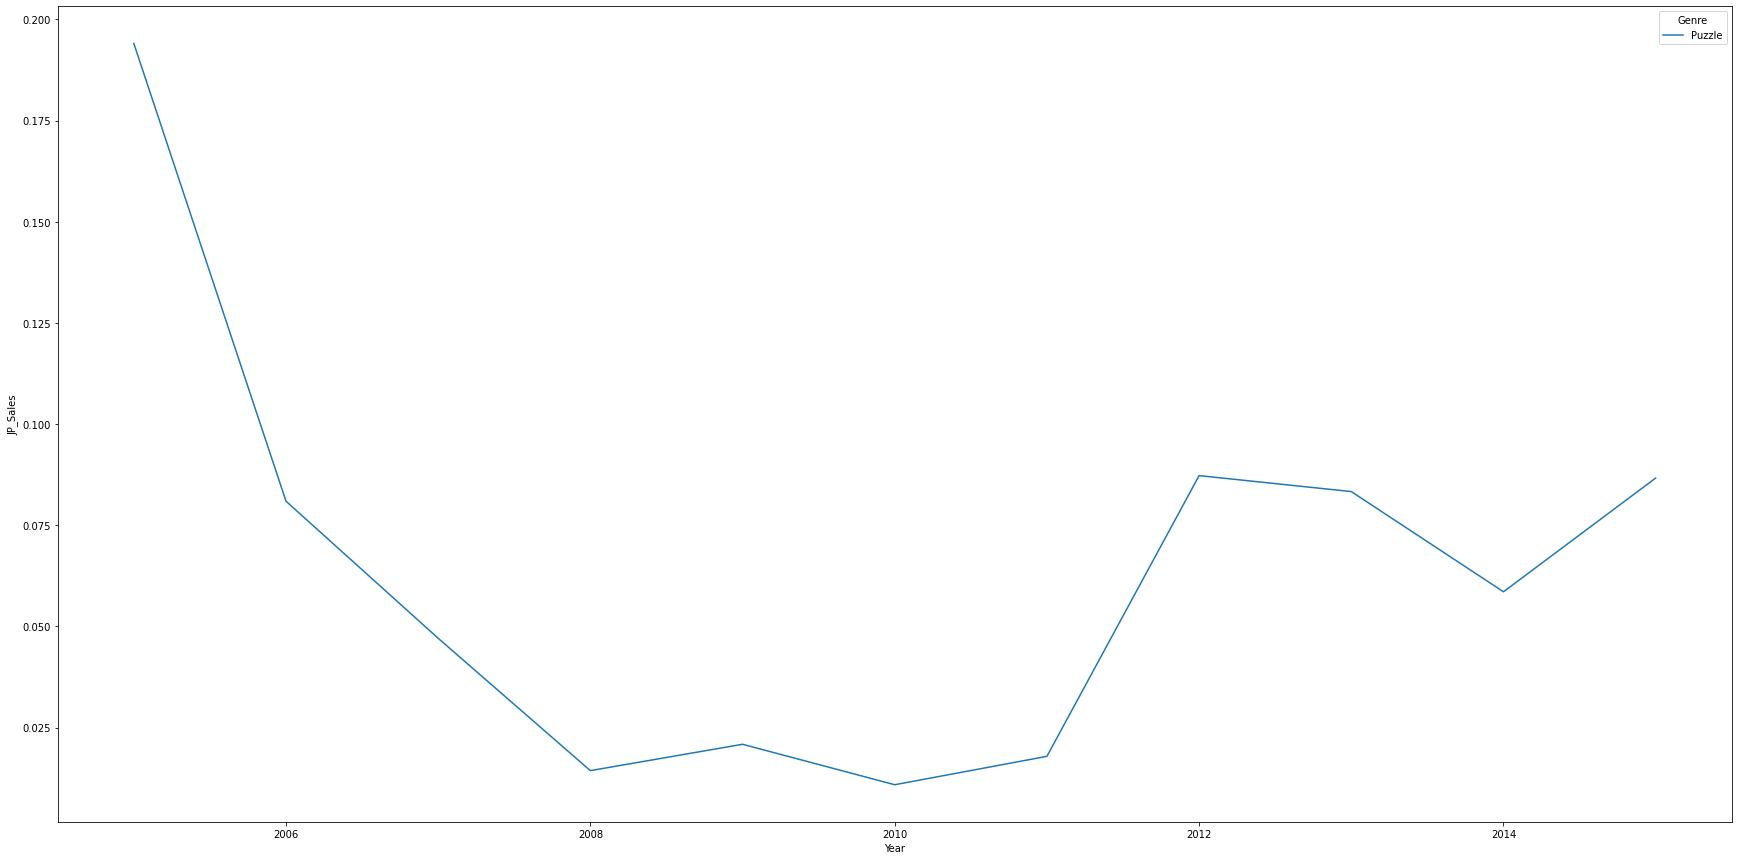

In [78]:
Puzzle = (df.Genre == 'Puzzle') & (df.Year >= 2005)
df[Puzzle]
fig, ax = plt.subplots(figsize=(30, 15))
sns.lineplot(data=df[Puzzle], x='Year', y='JP_Sales', hue='Genre', ax=ax, ci=None)

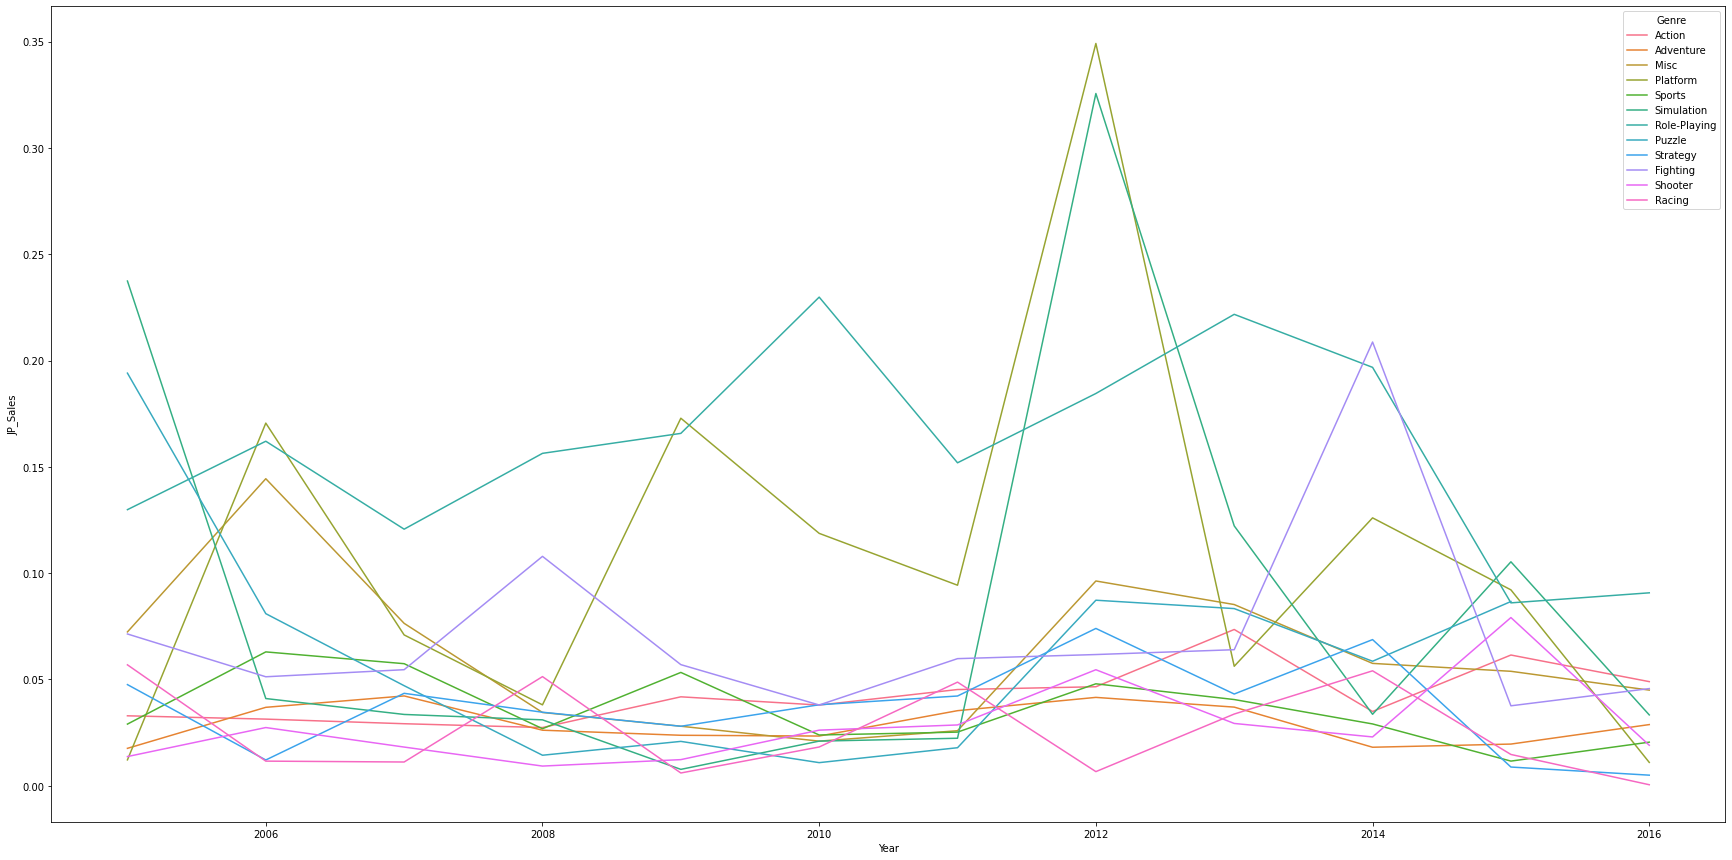

In [79]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.lineplot(data=df_Modern, x='Year', y='JP_Sales', hue='Genre', ax=ax, ci=None)

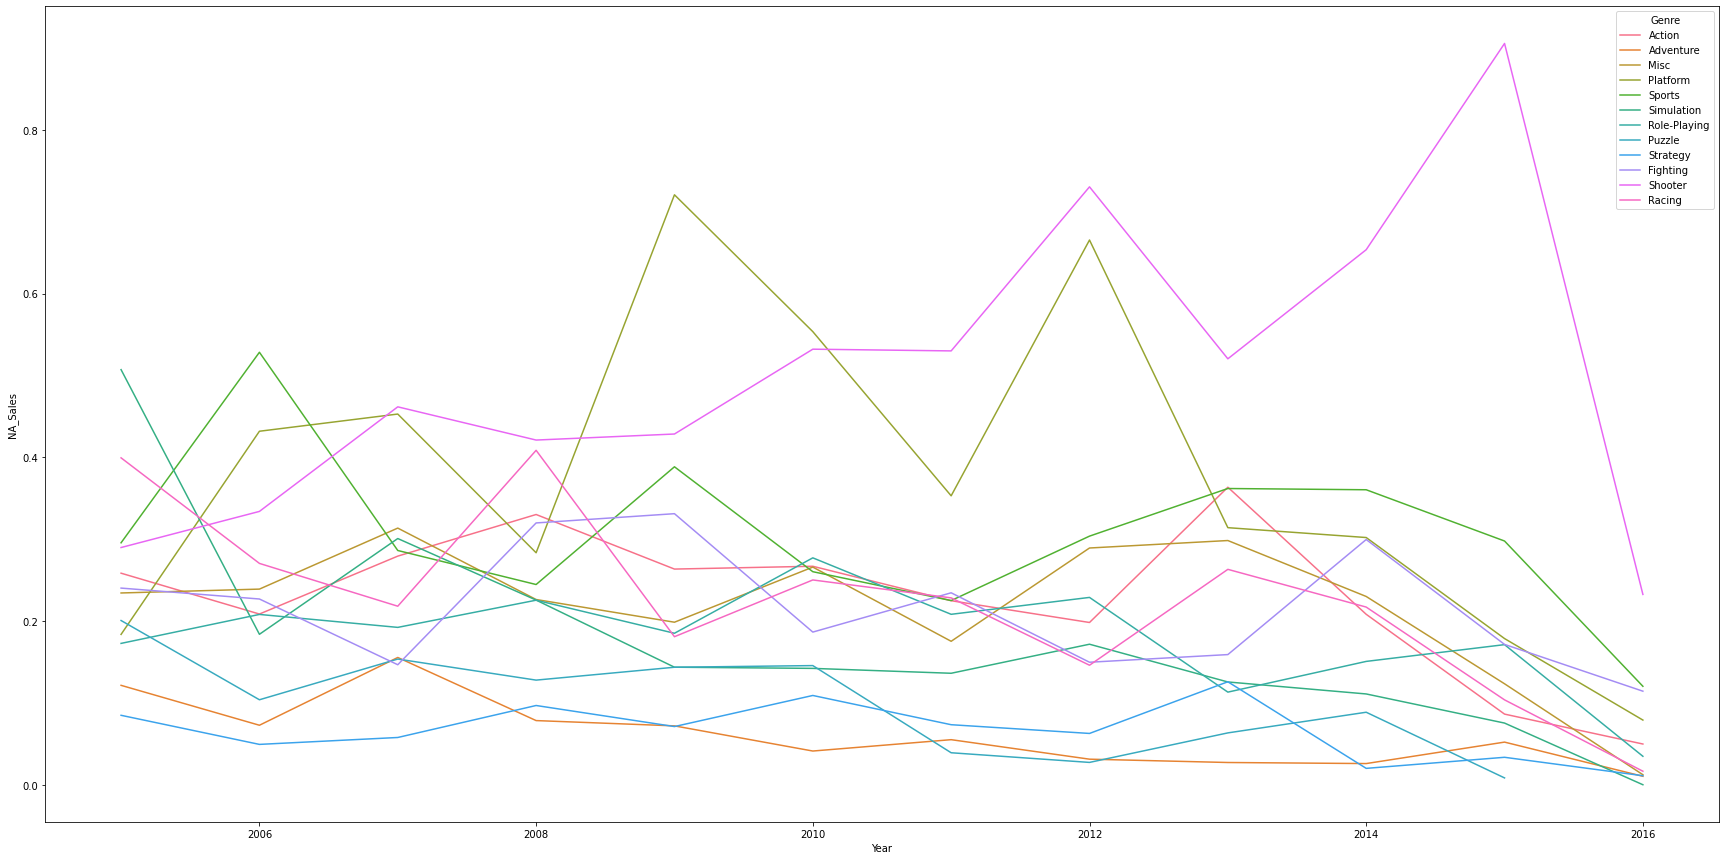

In [80]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.lineplot(data=df_Modern, x='Year', y='NA_Sales', hue='Genre', ax=ax, ci=None)

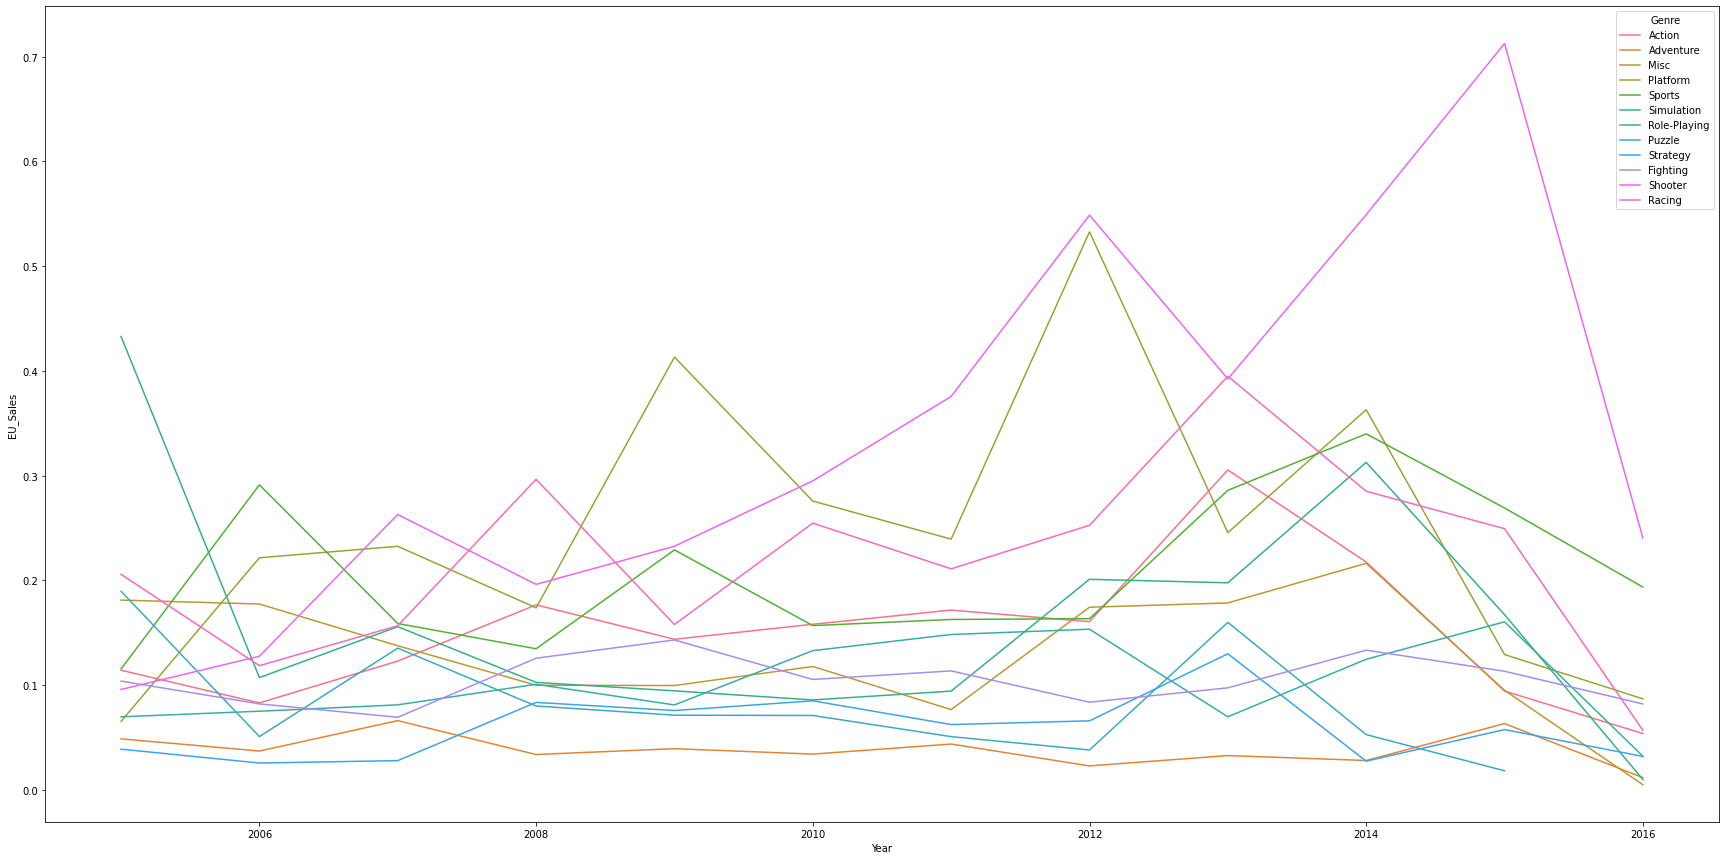

In [81]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.lineplot(data=df_Modern, x='Year', y='EU_Sales', hue='Genre', ax=ax, ci=None)

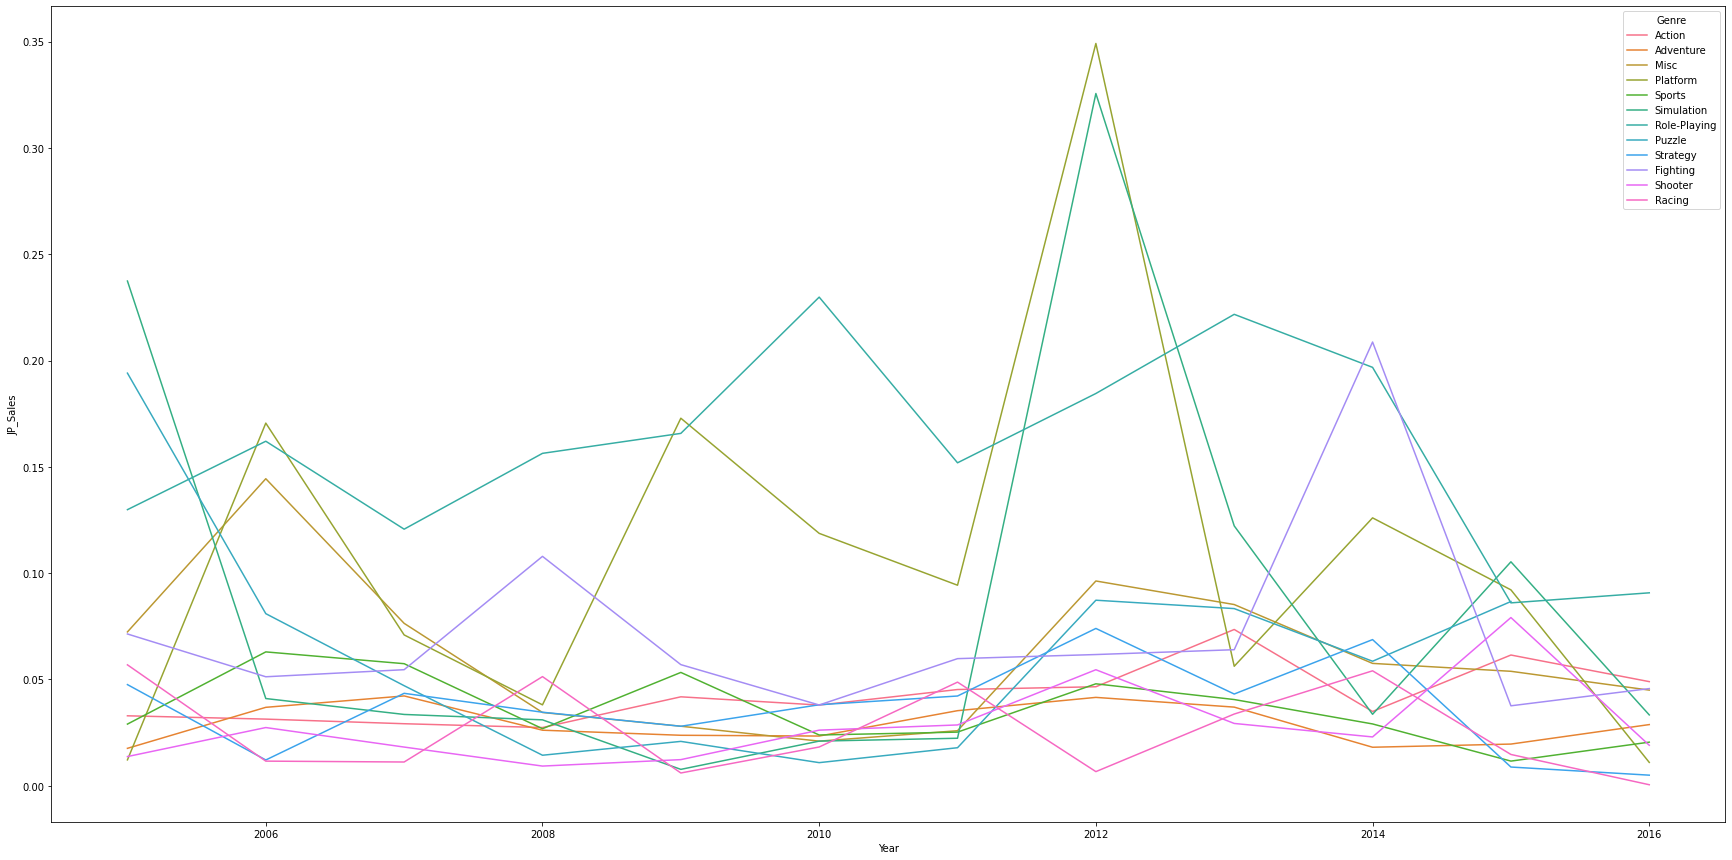

In [93]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.lineplot(data=df_Modern, x='Year', y='JP_Sales', hue='Genre', ax=ax, ci=None)

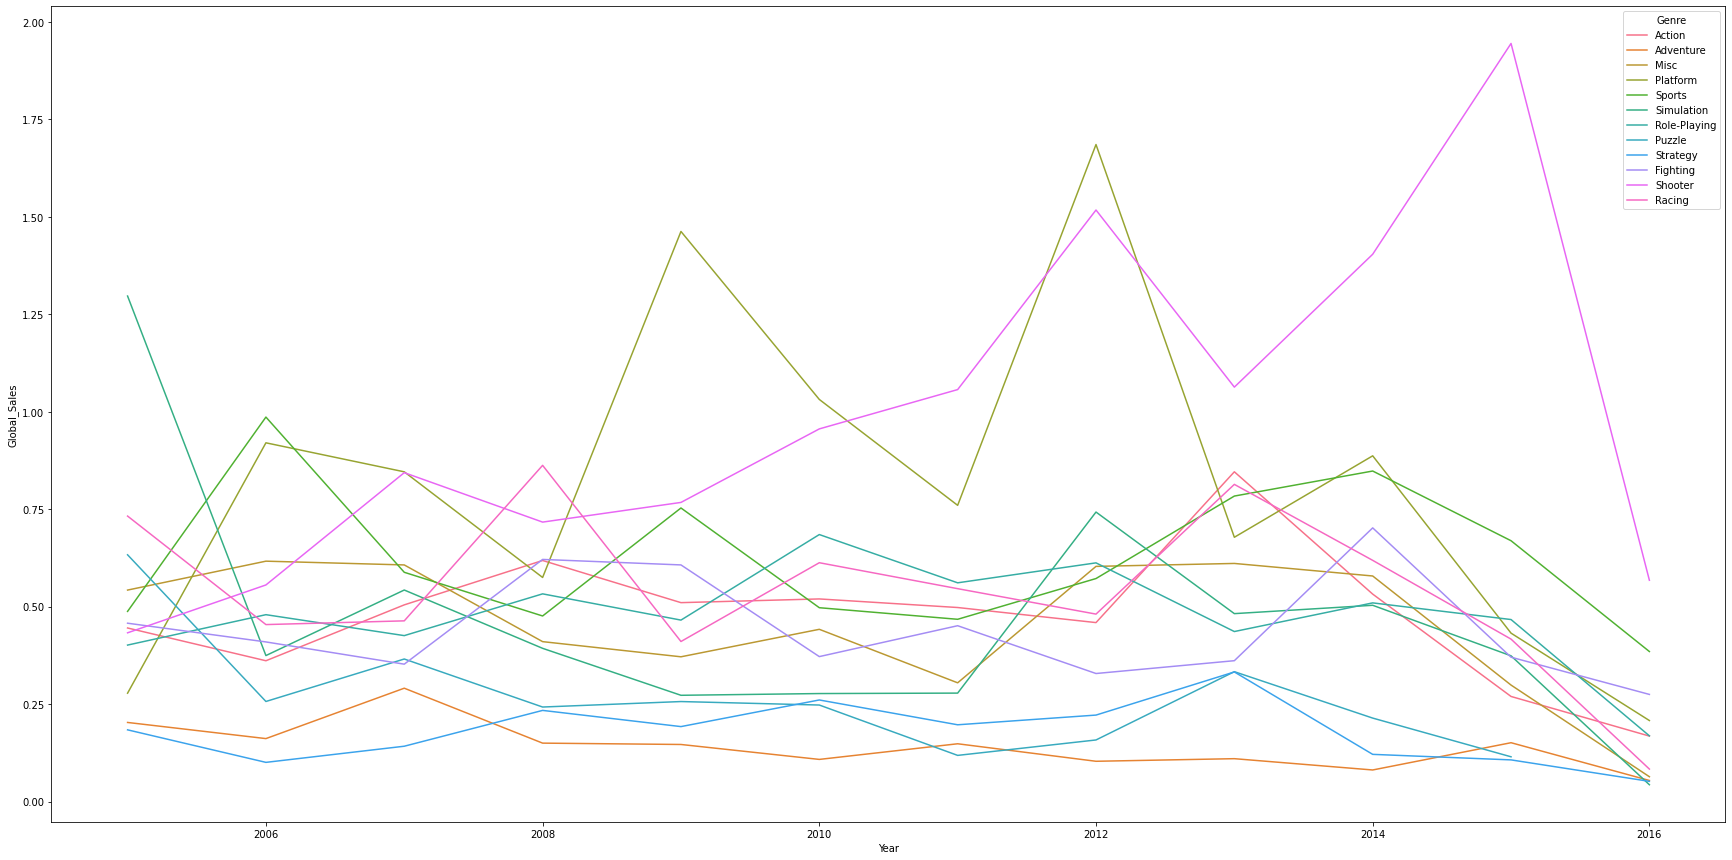

In [83]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.lineplot(data=df_Modern, x='Year', y='Global_Sales', hue='Genre', ax=ax, ci=None)

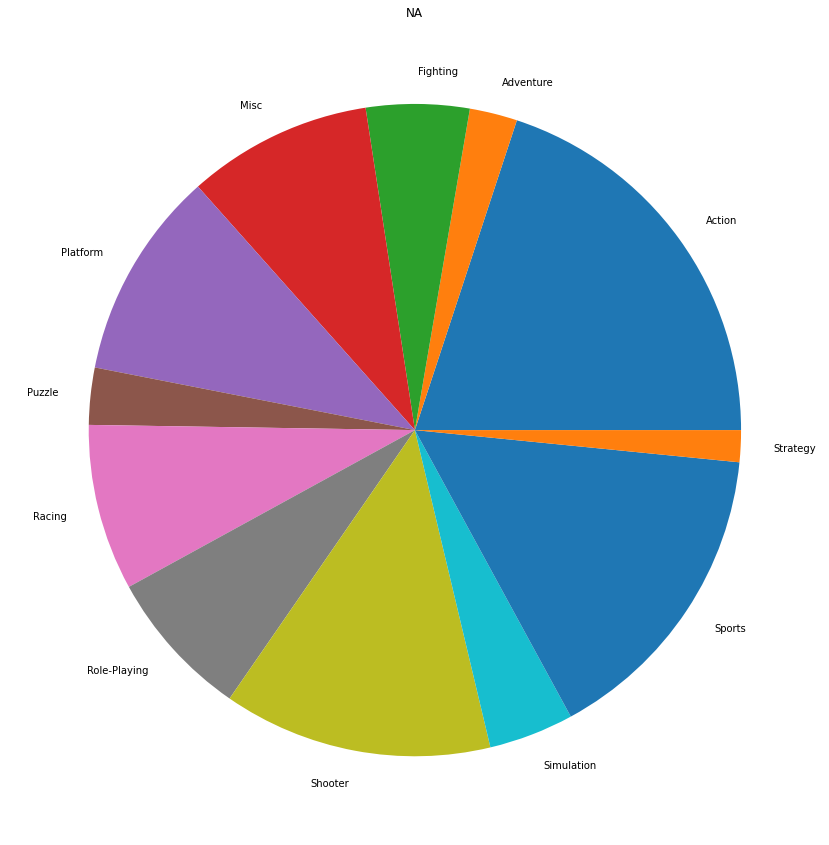

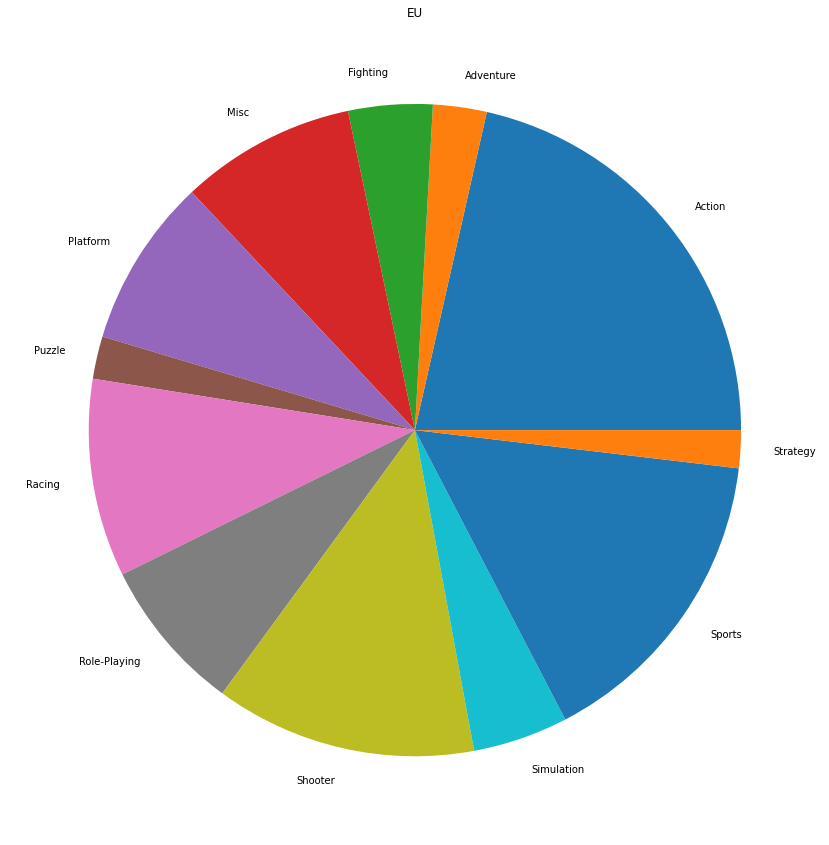

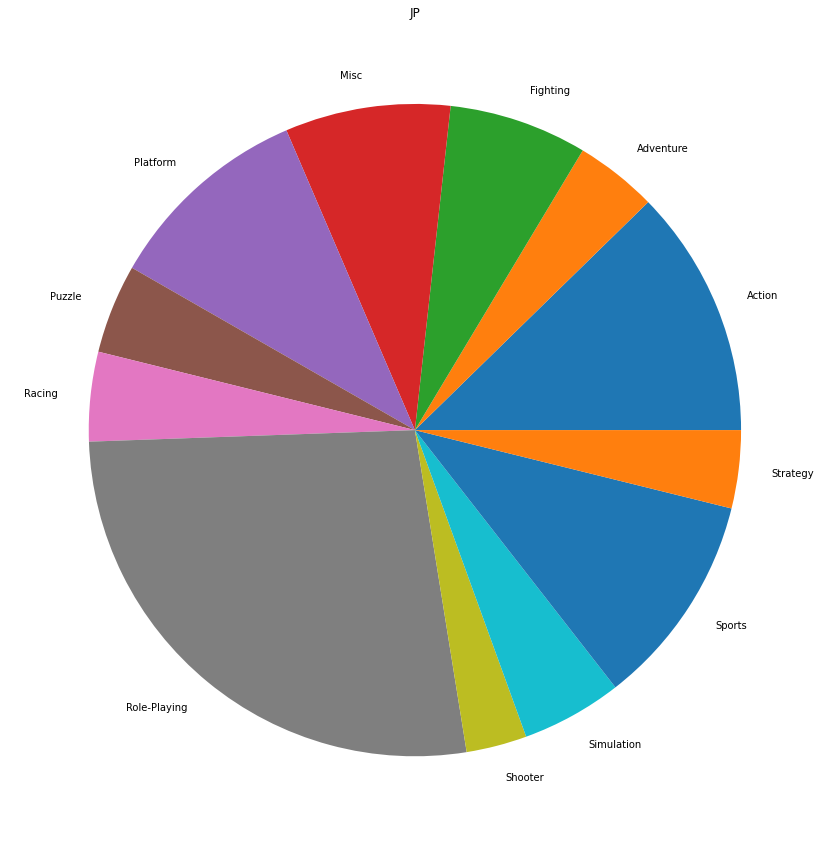

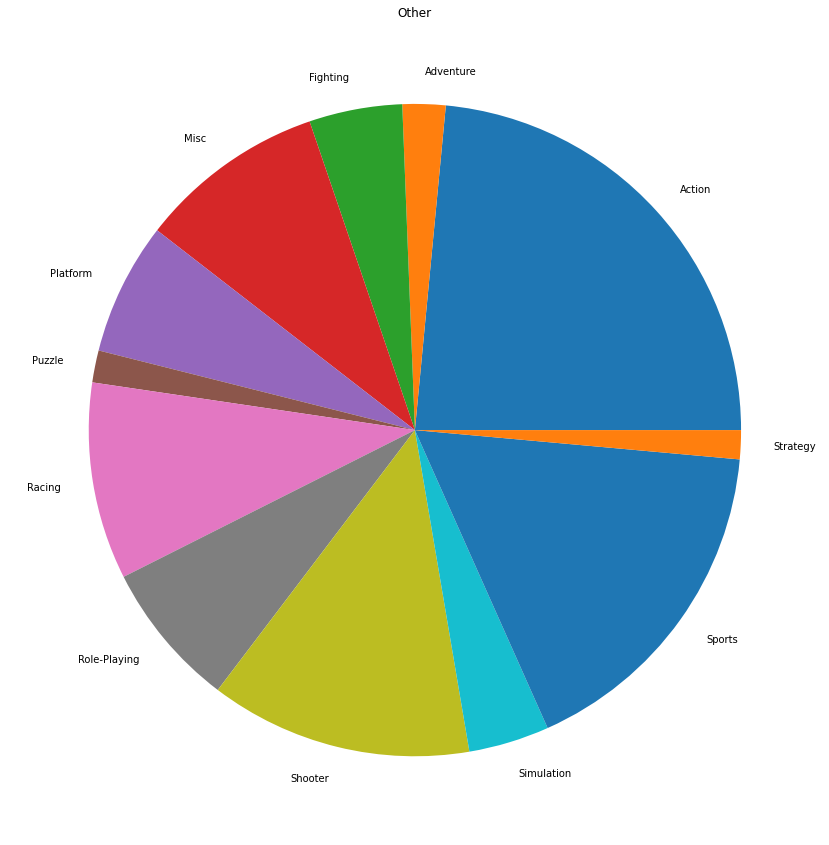

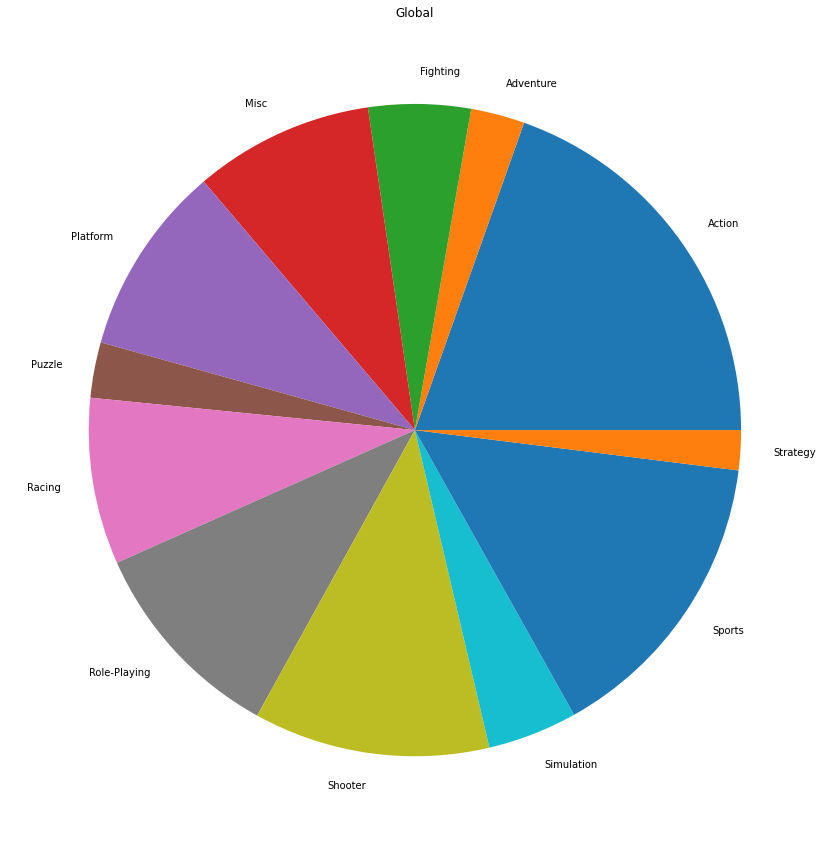

In [84]:
Genre_NA = df.groupby(['Genre'])['NA_Sales'].sum()
Genre_EU = df.groupby(['Genre'])['EU_Sales'].sum()
Genre_JP = df.groupby(['Genre'])['JP_Sales'].sum()
Genre_Other = df.groupby(['Genre'])['Other_Sales'].sum()
Genre_Global = df.groupby(['Genre'])['Global_Sales'].sum()

locate_Genre = pd.DataFrame()
locate_Genre = locate_Genre.append(Genre_NA)
locate_Genre = locate_Genre.append(Genre_EU)
locate_Genre = locate_Genre.append(Genre_JP)
locate_Genre = locate_Genre.append(Genre_Other)
locate_Genre = locate_Genre.append(Genre_Global)
locate_Genre = locate_Genre.T


pie_locate = locate_Genre.T
label = pie_locate.columns.values.tolist()
plt.figure(figsize=(15, 15))
plt.pie(pie_locate.loc['NA_Sales'], labels=label)
plt.title('NA')

plt.figure(figsize=(15, 15))
plt.pie(pie_locate.loc['EU_Sales'], labels=label)
plt.title('EU')

plt.figure(figsize=(15, 15))
plt.pie(pie_locate.loc['JP_Sales'], labels=label)
plt.title('JP')

plt.figure(figsize=(15, 15))
plt.pie(pie_locate.loc['Other_Sales'], labels=label)
plt.title('Other')

plt.figure(figsize=(15, 15))
plt.pie(pie_locate.loc['Global_Sales'], labels=label)
plt.title('Global')

plt.show()

In [85]:
df.describe(percentiles=[.80])

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,2006.406748,0.265195,0.147378,0.078283,0.048234,0.539091
std,5.832087,0.822431,0.508340,0.309272,0.189678,1.563905
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
80%,2011.000000,0.310000,0.160000,0.060000,0.050000,0.610000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [86]:
bestseller = pd.DataFrame(df.groupby(["Name", "Year"])[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index())
b = bestseller.head(20)

In [98]:
bestseller.head(20)

,Name,Year,Global_Sales
0,Wii Sports,2006,82.74
1,Super Mario Bros.,1985,40.24
2,Grand Theft Auto V,2013,37.77
3,Mario Kart Wii,2008,35.83
4,Wii Sports Resort,2009,33.00
5,Pokemon Red/Pokemon Blue,1996,31.38
6,Call of Duty: Modern Warfare 3,2011,30.84
7,Tetris,1989,30.26
8,New Super Mario Bros.,2006,30.01
9,Call of Duty: Black Ops II,2012,29.73


<BarContainer object of 20 artists>

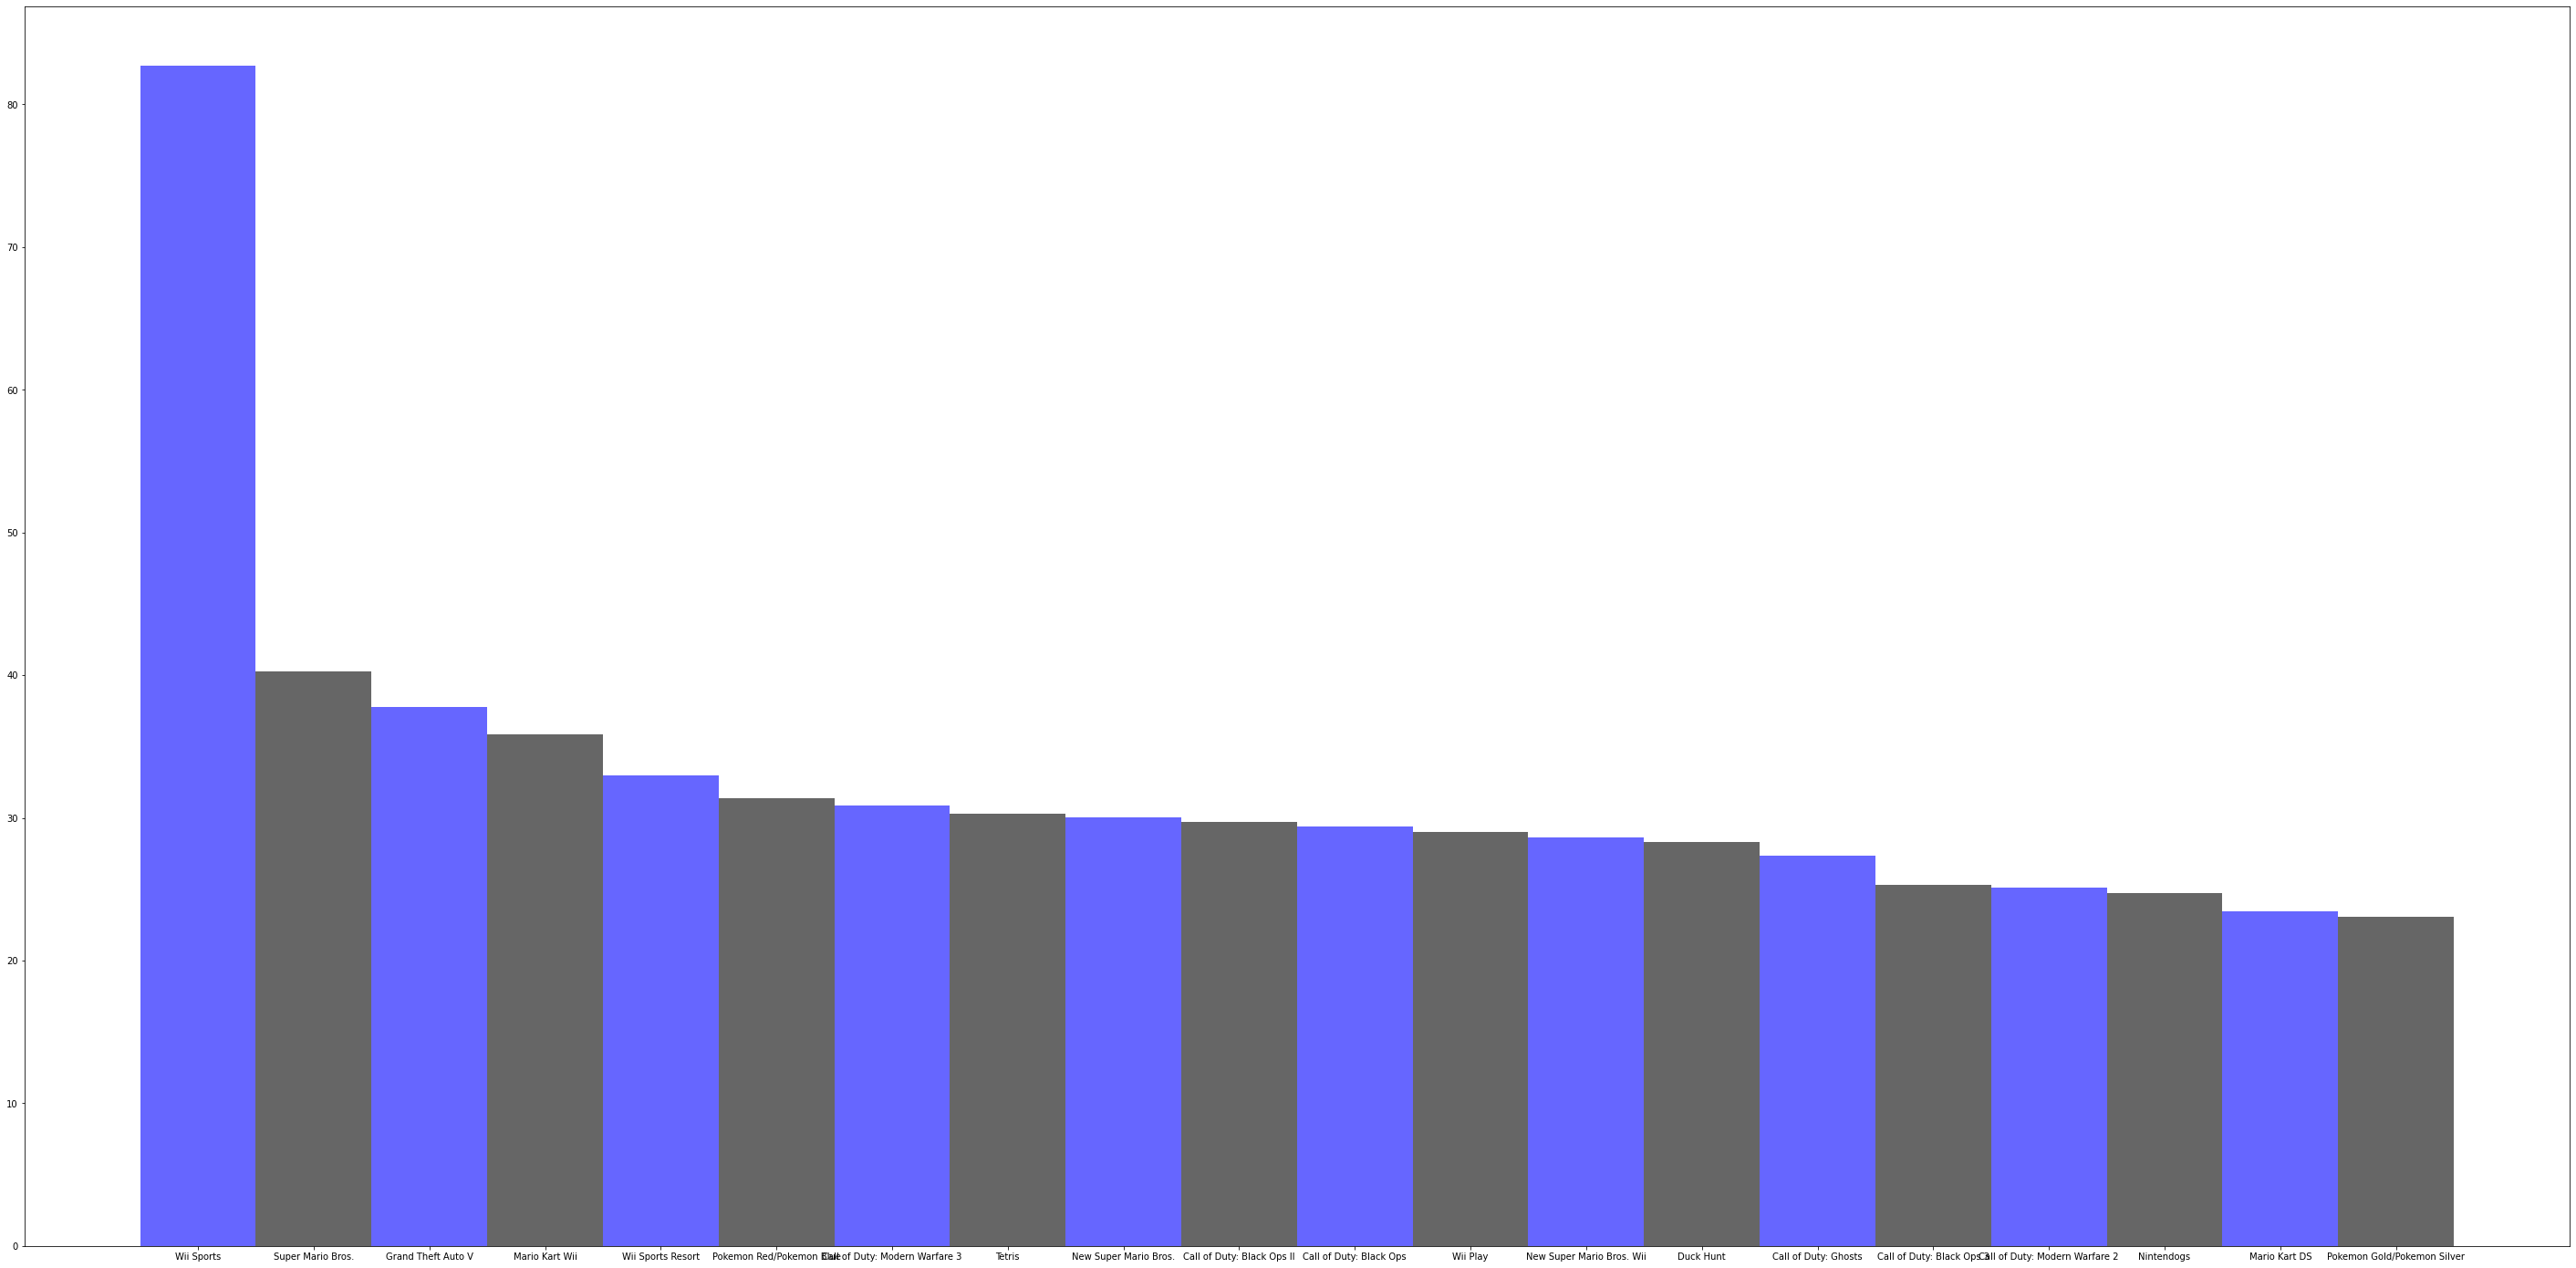

In [97]:
plt.subplots(figsize=(50, 25))
plt.bar(b["Name"], b["Global_Sales"],color = ['blue',  'black'], alpha = 0.6, width = 1.0)

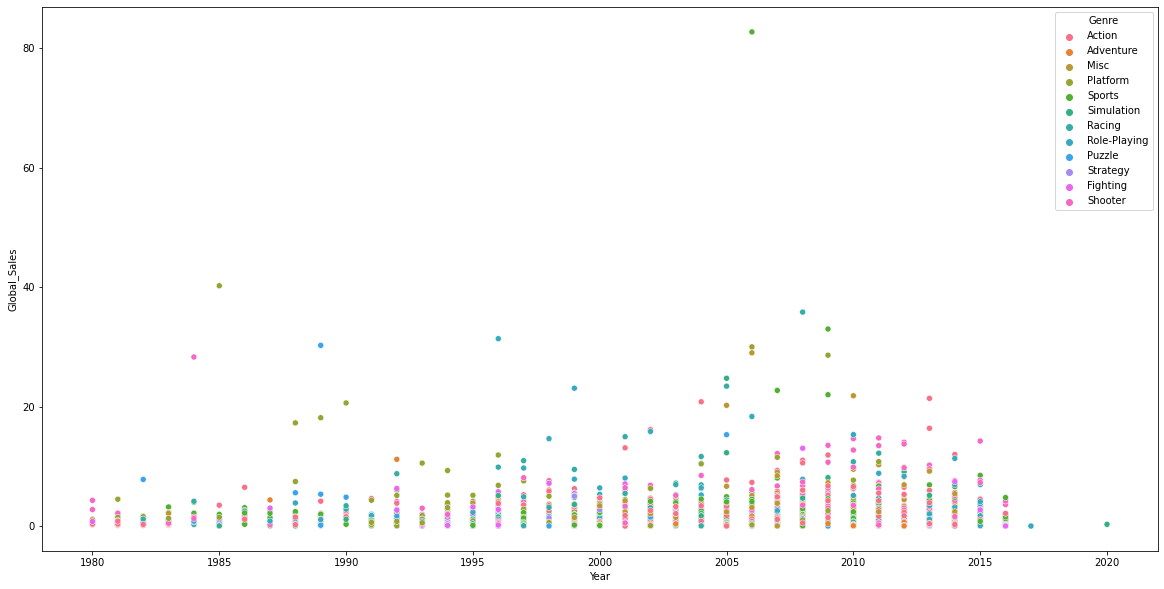

In [99]:
plt.subplots(figsize=(20, 10))
sns.scatterplot(x='Year', y='Global_Sales', hue = "Genre", data=df)

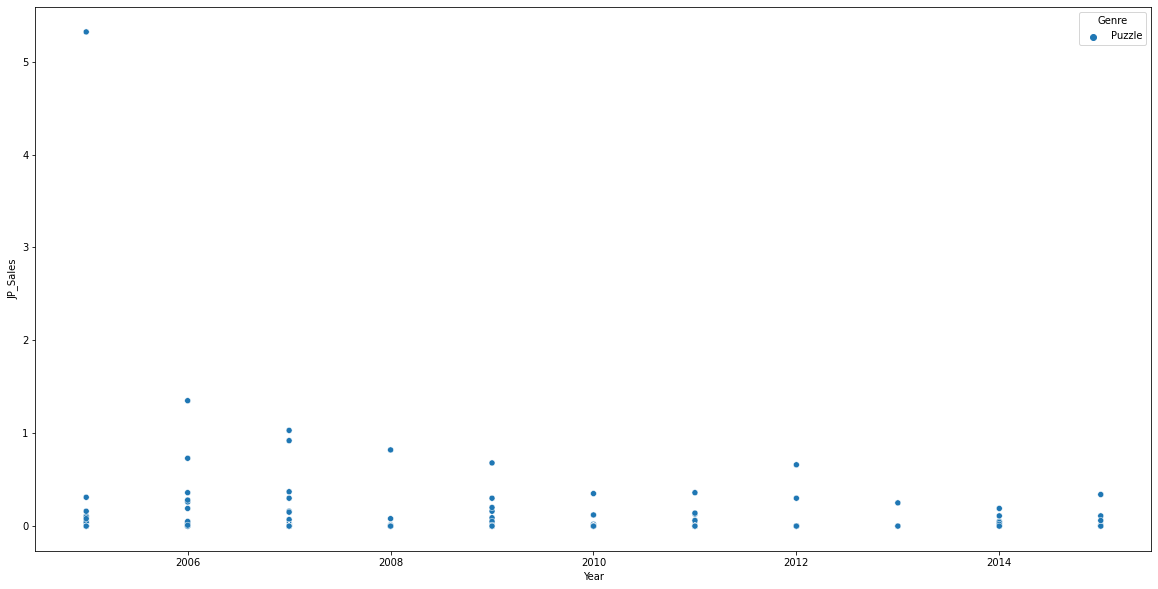

In [89]:
plt.subplots(figsize=(20, 10))
sns.scatterplot(x='Year', y='JP_Sales', hue = "Genre", data=df[Puzzle])

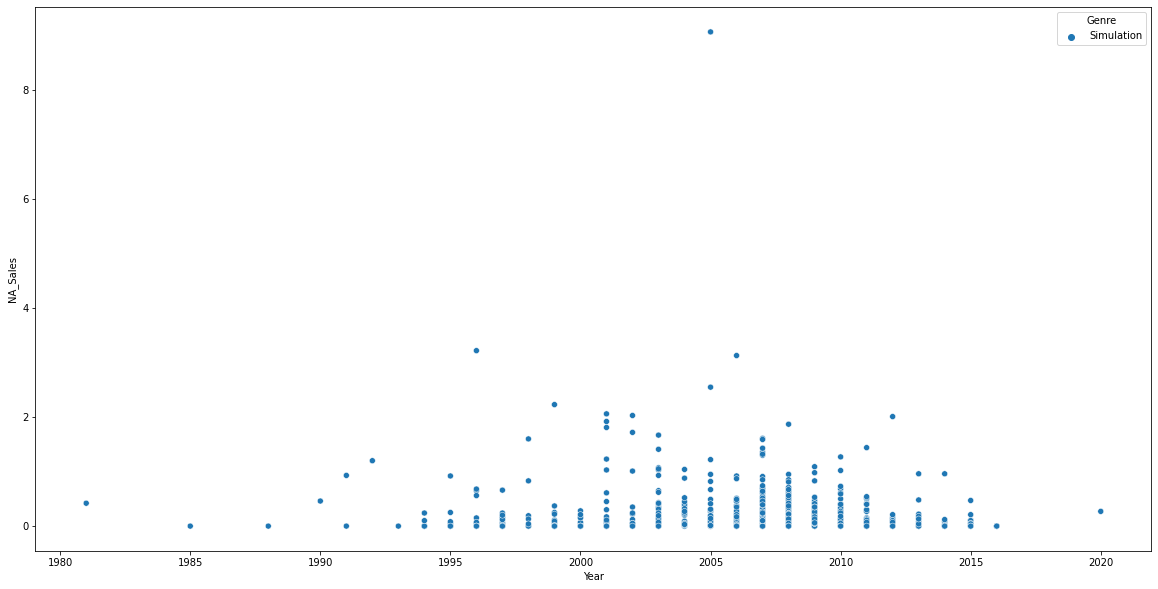

In [90]:
plt.subplots(figsize=(20, 10))
sns.scatterplot(x='Year', y='NA_Sales', hue = "Genre", data=df[Simulation])

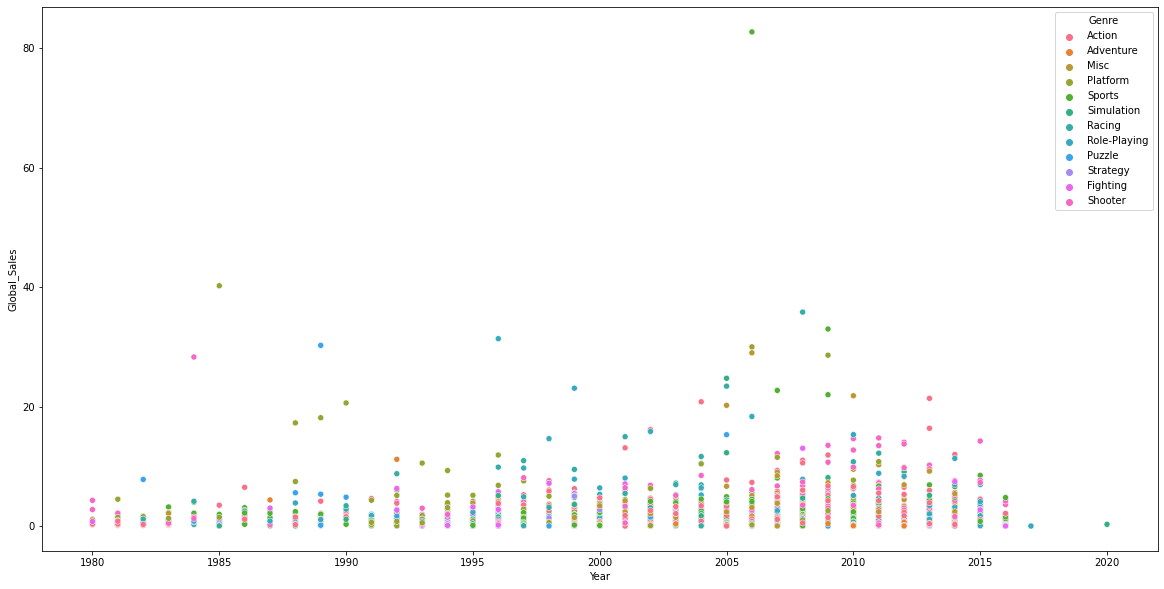

In [91]:
plt.subplots(figsize=(20, 10))
sns.scatterplot(x='Year', y='Global_Sales', hue = "Genre", data=df)

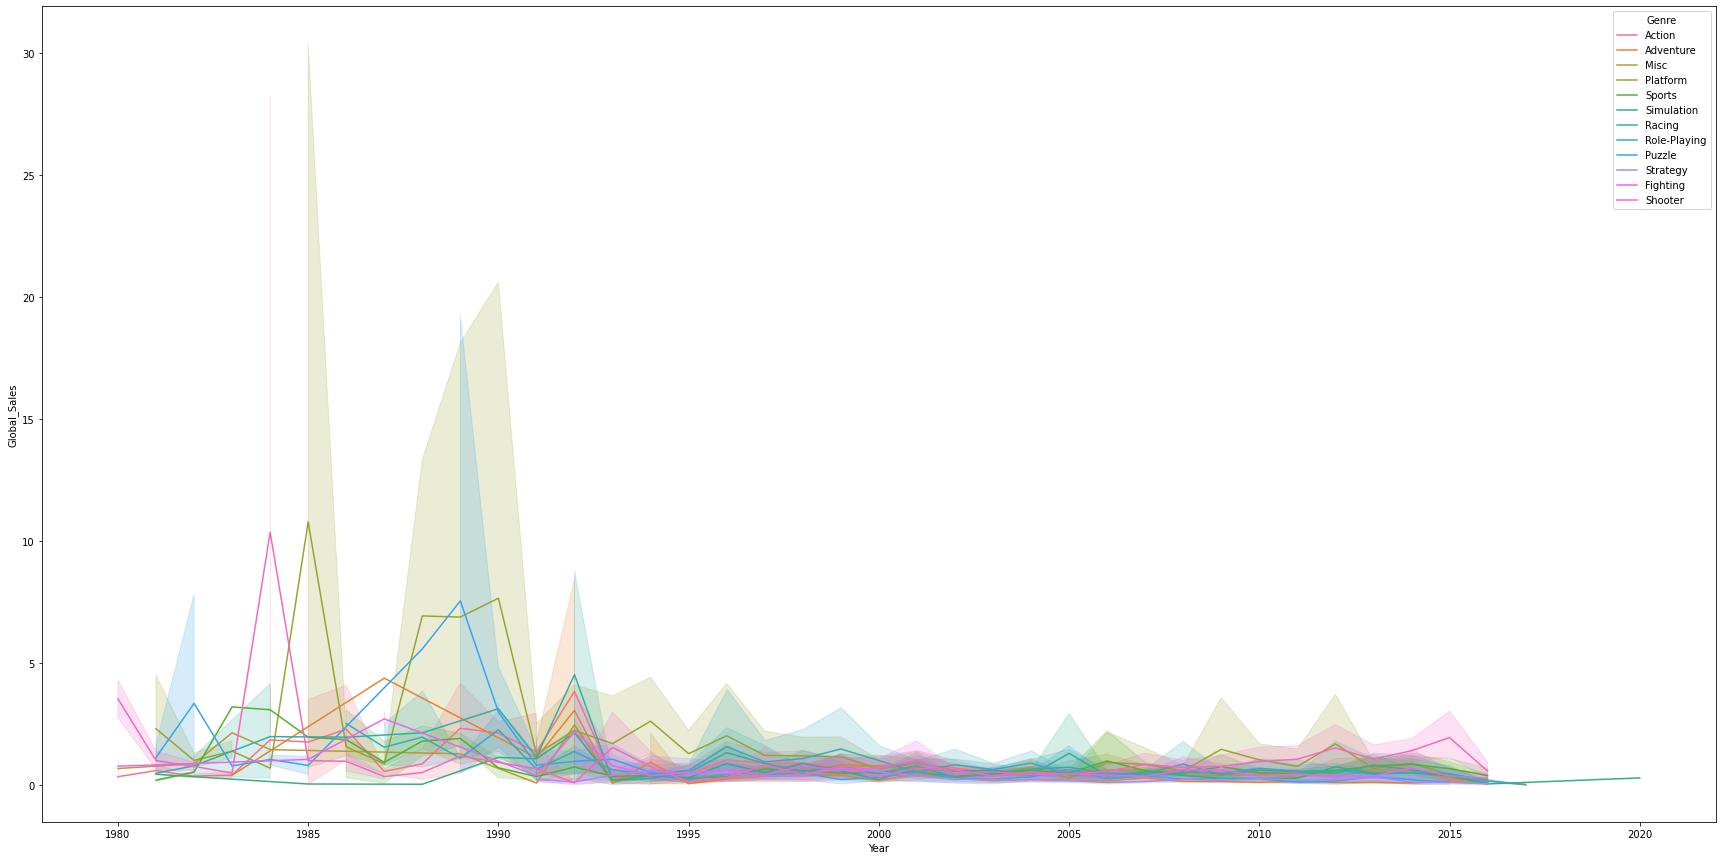

In [92]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.lineplot(data=df, x='Year', y='Global_Sales', hue='Genre', ax=ax)